## What is DBSCAN?

DBSCAN, as its name implies, is a density-based clustering algorithm. Here, *density* refers to the concentration and closeness of data points in a cluster. In a nutshell, DBSCAN divides the observations into subgroups of high-density regions.

As mentioned before, DBSCAN doesn't require you to specify the number of clusters, but you do need to tune two hyperparameters: `epsilon` ($\epsilon$) and `minPts`. The $\epsilon$ parameter defines the radius within which the algorithm searches for nearby neighbors. You can imagine each data point as having a circle with radius $\epsilon$ drawn around it. The `minPts` parameter is the minimum number of points required to form a cluster. Using $\epsilon$ and `minPts`, you can assign each data point to one of the following three types:

* **Core point:** A point that has at least a minimum number of other points (`minPts`) within its $\epsilon$ neighborhood.
* **Border point:** A point that is within the $\epsilon$ neighborhood of a core point with fewer than the minimum number of other points (`minPts`) within its own $\epsilon$ neighborhood.
* **Noise point:** A point that is neither a core point nor a border point.

In the image below, you can see the three types of points. The blue points are the core points, the black points are the border points, and the white points are the noise points.

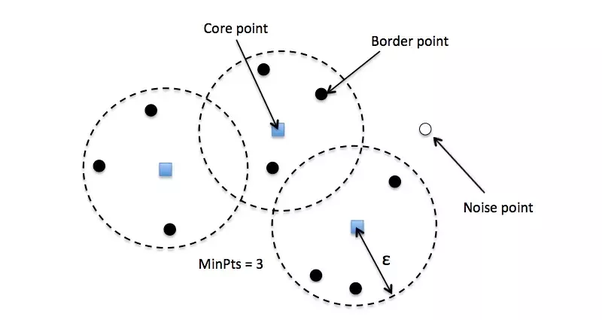


## The algorithm

The DBSCAN algorithm is simple. It follows the process described below, and it repeats this process until all points have been assigned to a cluster or are labeled as visited.

1. Select a point $p$ randomly.
2. Get all points in the $\epsilon$ neighborhood of $p$.
3. If $p$ is a core point, form a cluster. Recursively find all its connected points in the $\epsilon$ neighborhood and assign them to the same cluster as $p$.
4. If $p$ isn't a core point, iterate over the unvisited points in the dataset.

Below, you can see the DBSCAN algorithm in action in a well-separated space of clusters:

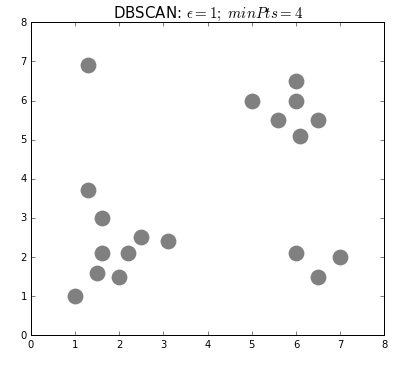

As highlighted before, DBSCAN can also identify circular clusters. Below, look at how DBSCAN can work through this problem:

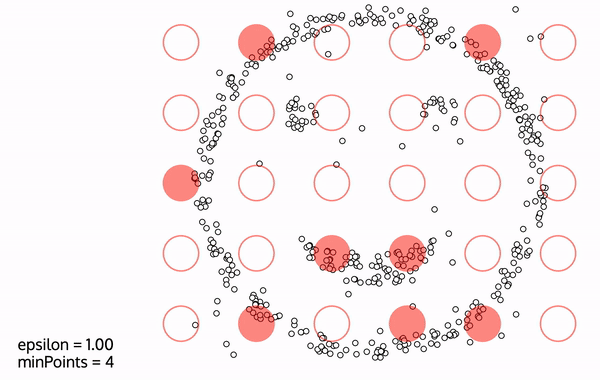

If you want to experiment with how DBSCAN performs on different datasets, check out [this interactive visualization of DBSCAN clustering](https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/).

## Speed

DBSCAN is one of the speediest and most efficient clustering algorithms. It iterates over each of the $n$ observations that you have in the dataset. In each iteration, it finds the observations that are in the $\epsilon$ neighborhood of the observation. Hence, its time complexity is $O(n^2)$. This makes DBSCAN scale more efficiently than k-means or hierarchical clustering. Because of this, **DBSCAN is one of the first algorithms to try**, especially in exploratory data analysis and open-ended research.

## DBSCAN in action

Now, check out how DBSCAN performs on the *Iris* dataset that you used in the previous lessons. Scikit-learn provides the `DBSCAN` algorithm from its `cluster` module. So, you can use it by running the following import command: `from sklearn.cluster import DBSCAN`.

First, import the packages that you'll use:

In [11]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
import warnings
warnings.filterwarnings("ignore")

It's important to scale variables before clustering, so standardize your features first:

In [12]:
# Loading the data from scikit-learn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

Next, run the DBSCAN algorithm on the standardized data. The parameters of the `DBSCAN` class are `eps` and `min_samples`. Here, `eps` refers to the $\epsilon$ parameter, and `min_samples` refers to the `minPts` parameter that was mentioned earlier. Below, they are initially set as `eps=1` and `min_samples=5`, but you can try other values and search for the best ones.

In [13]:
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

Now, you can visualize how DBSCAN assigned clusters to the observations by using the first two principal components of the data. In the plot below, the numbers show the cluster that each observation has been assigned to by the algorithm. The colors denote the true classes.

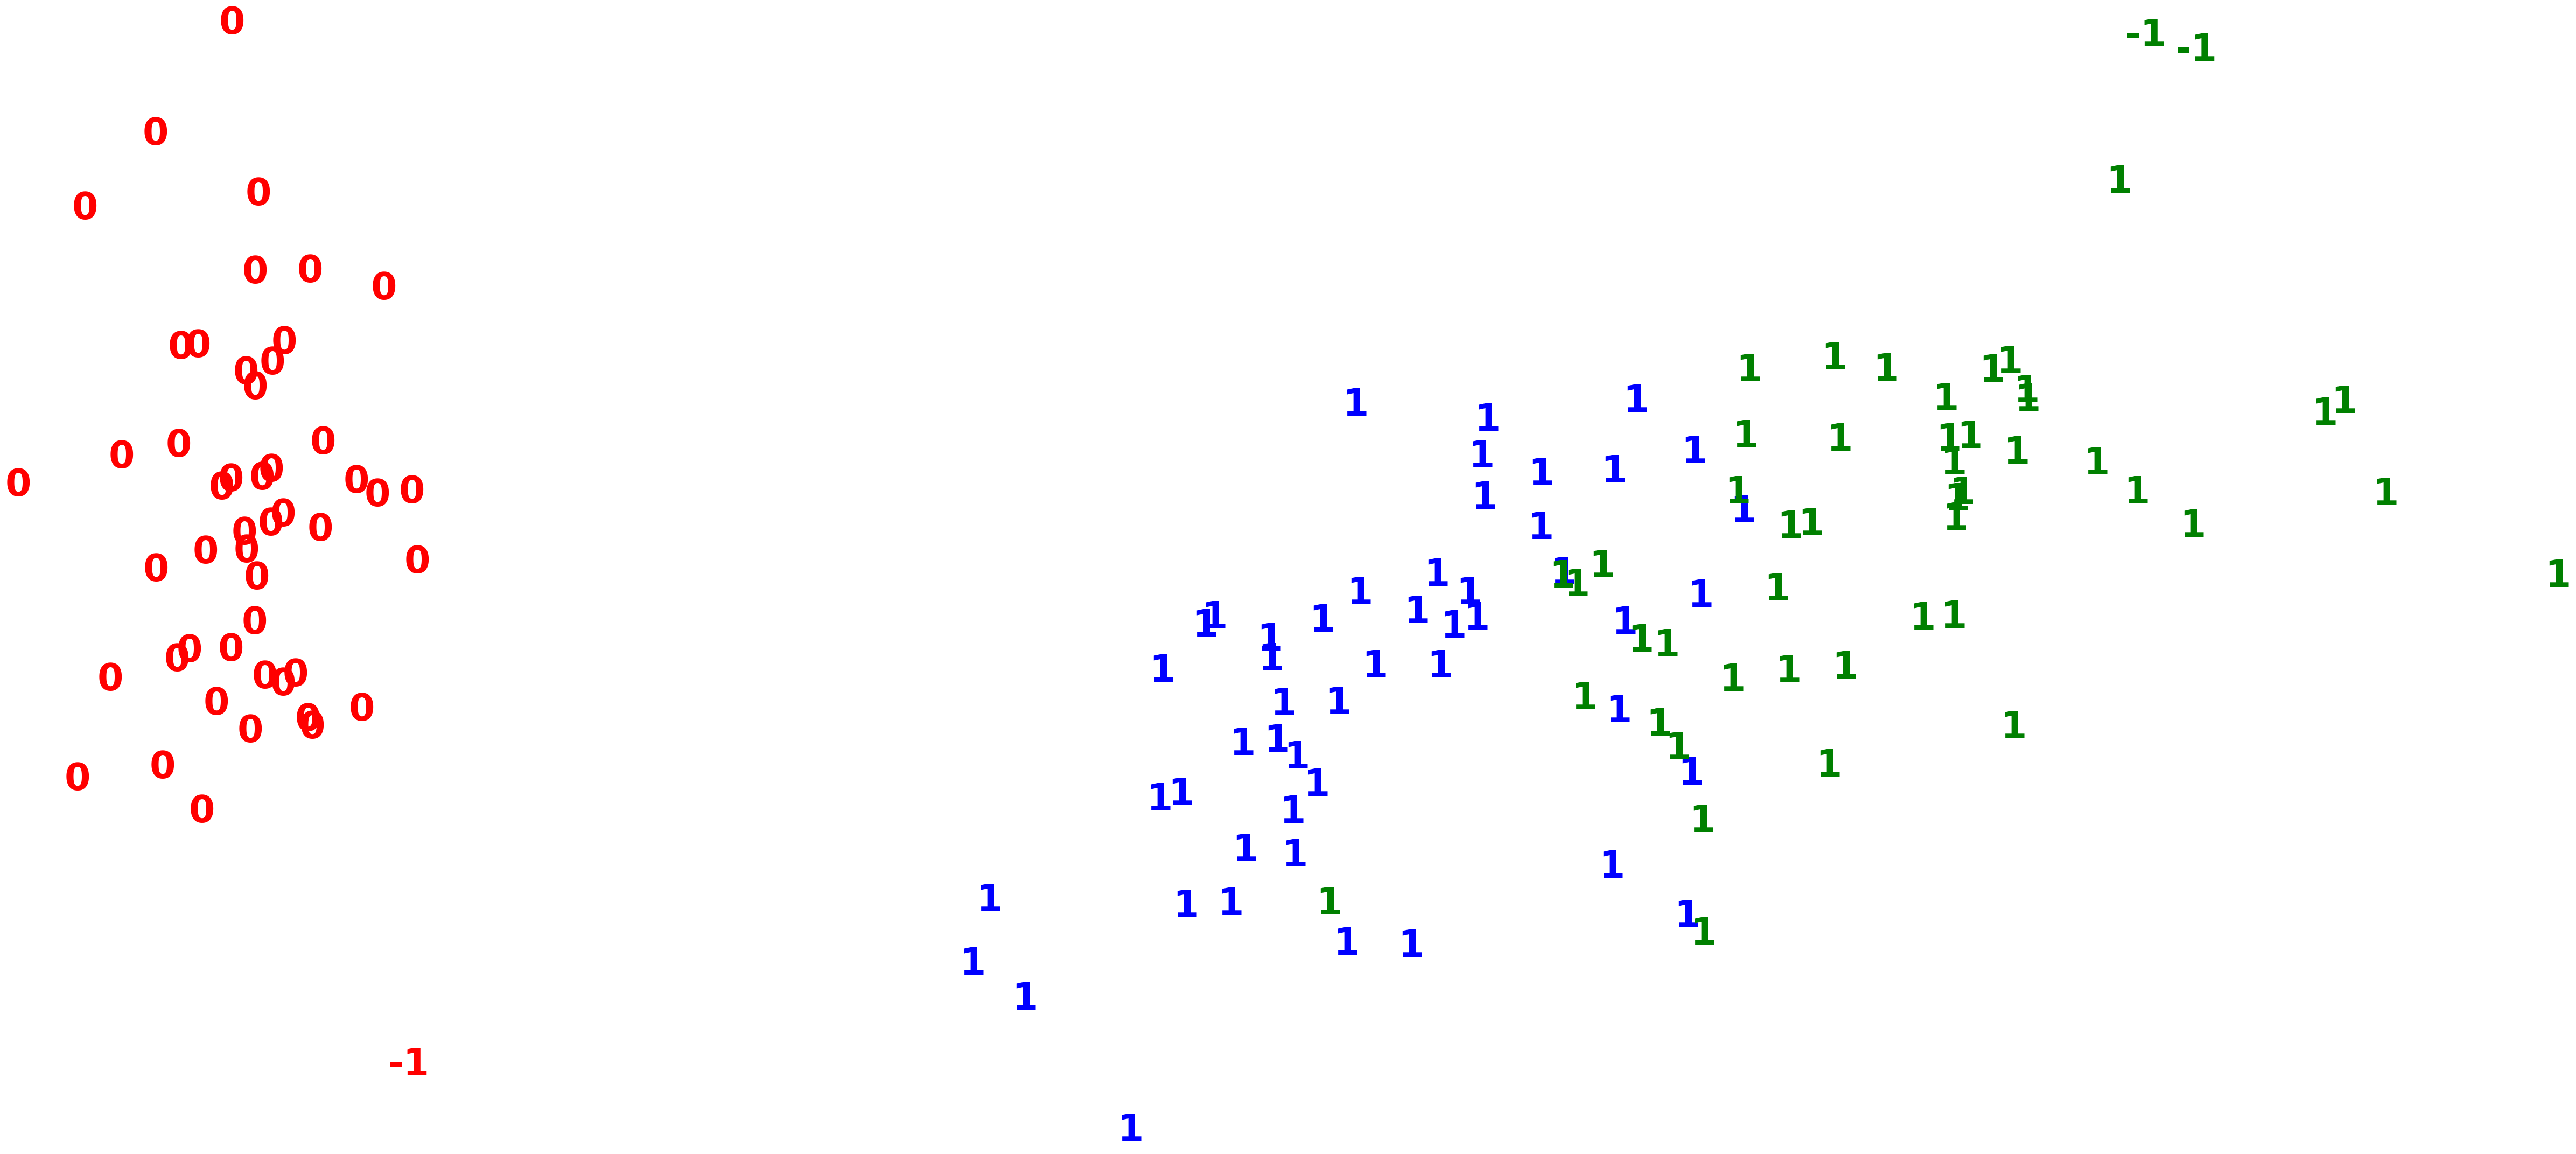

In [14]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

First of all, notice that in the graph above, you can see three cluster labels: `0`, `1`, and `-1`. Remember that DBSCAN can identify noise in data. All of the observations that you see labeled as `-1` are actually noise; hence, they don't belong to any cluster. So, when applying DBSCAN using scikit-learn, keep that in mind.

In the figure above, DBSCAN assigns all the observations into two clusters labeled `0` and `1`. The three observations that are labeled as `-1` are noise. Because you know that the *Iris* data includes three species, the two clusters that DBSCAN discovers are not what you want. Actually, you can see that DBSCAN couldn't distinguish between the two species that aren't linearly separable from each other. Hence, it performs worse than both k-means and hierarchical clustering. You can confirm this by looking at the ARI score:

In [15]:
print("Adjusted Rand Index of the DBSCAN solution: {}"
      .format(metrics.adjusted_rand_score(y, clusters)))

Adjusted Rand Index of the DBSCAN solution: 0.5535820784912958


As you can see, the ARI score of the DBSCAN solution is lower than those of the k-means and hierarchical clustering solutions.

However, what if you don't know the ground truth for your data? For example, what if you didn't actually know that there are three species in the *Iris* data? In this case, you can look at the silhouette score:

In [16]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(X_std, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.5382884306788227


It turns out that the silhouette score of the DBSCAN solution is higher than those for both  k-means and hierarchical clustering. Because of this, you should conclude that the DBSCAN solution is the better one. But you know that a good clustering method should come up with a three-cluster solution—so how is this possible?

This tension is indicative of the inherently challenging nature of clustering. The silhouette score measures the proximity of data points in a cluster to one another, with respect to their proximity to data points in the nearest other cluster. In the case of the *Iris* data, the observations of the linearly nonseparable species lower the silhouette score of the three-cluster solution. As a result, the silhouette score of the DBSCAN solution is higher than those of the k-means and hierarchical clustering solutions.

As you can see, by keeping your analysis limited to a single score, you risk deriving faulty conclusions. You should always try to understand the solution using all the information that's available to you.

#Q1.  Continue working with the [heart disease dataset](http://archive.ics.uci.edu/ml/datasets/Heart+Disease) from the UC Irvine Machine Learning Repository.

Load the dataset from Thinkful's database.

In [17]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine, text

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

with engine.begin() as conn:
    query = text("""SELECT * FROM heartdisease""")
    heart_disease_df = pd.read_sql_query(query, conn)

# no need for an open connection, as we're only doing a single query
engine.dispose()

Apply data preprocessing.

In [19]:
# Define the features and the outcome
X = heart_disease_df.iloc[:, :13]
y = heart_disease_df.iloc[:, 13]

# Replace missing values (marked by `?`) with a `0`
X = X.replace(to_replace='?', value=0)

# Binarize y so that `1` means heart disease diagnosis and `0` means no diagnosis
y = np.where(y > 0,1, 0)

# Standardize the data.
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

### Q1(a). Apply DBSCAN to the heart disease dataset by trying different values for the `eps` and `min_samples` parameters. You'll realize that it's really hard—if not impossible—to get a two-cluster solution using DBSCAN.

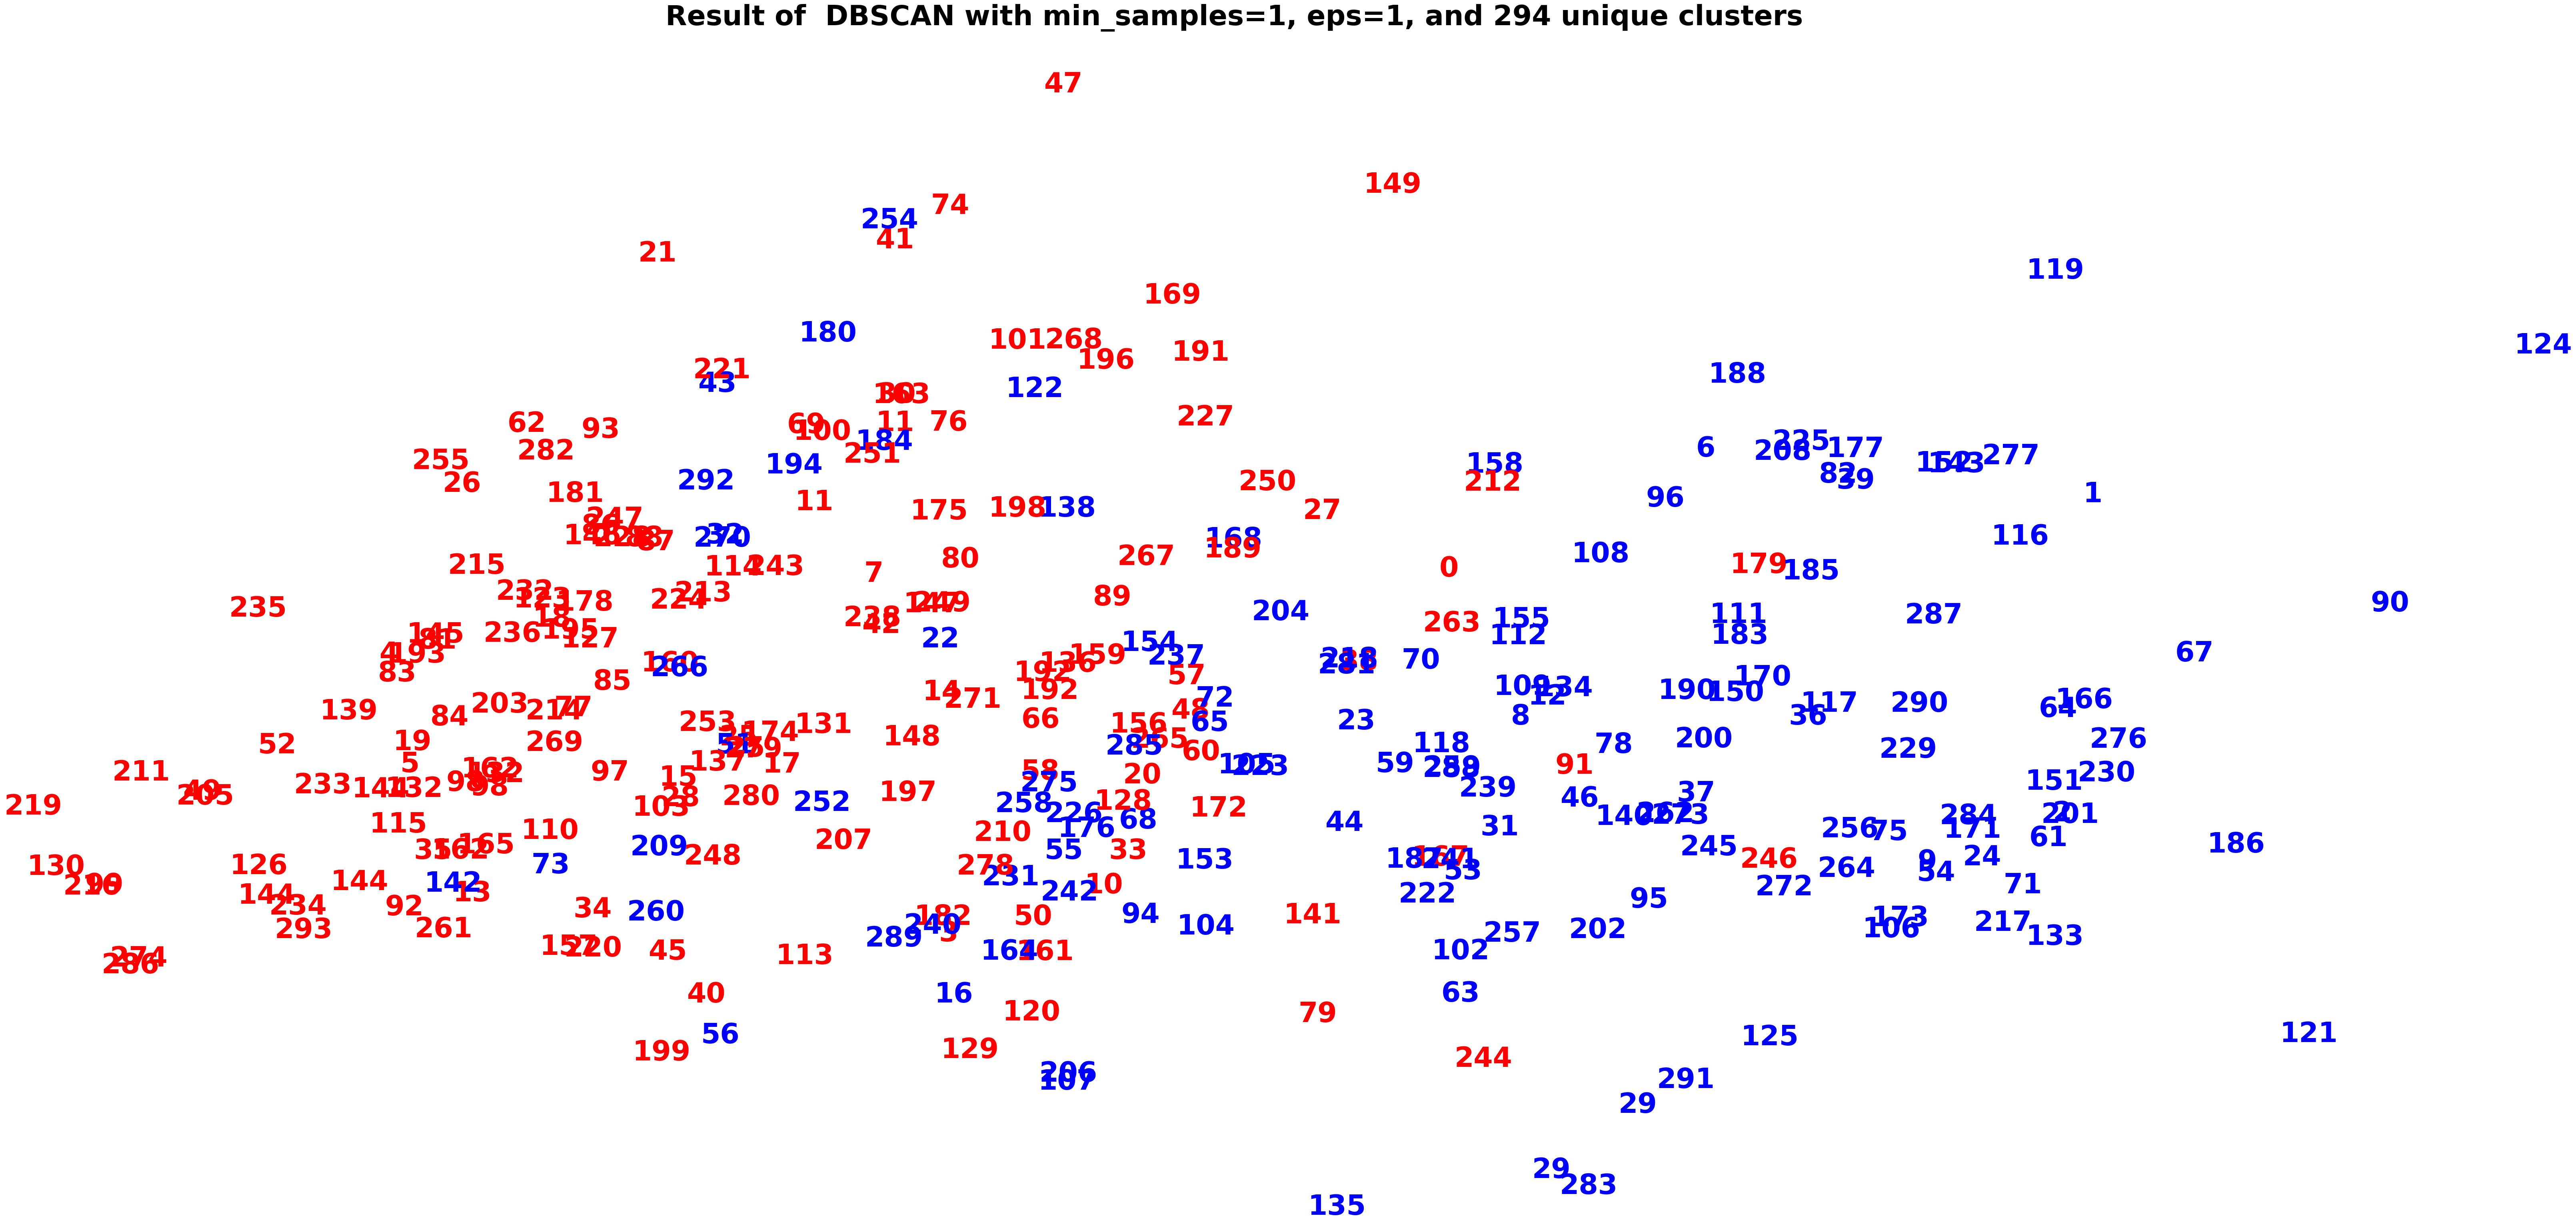

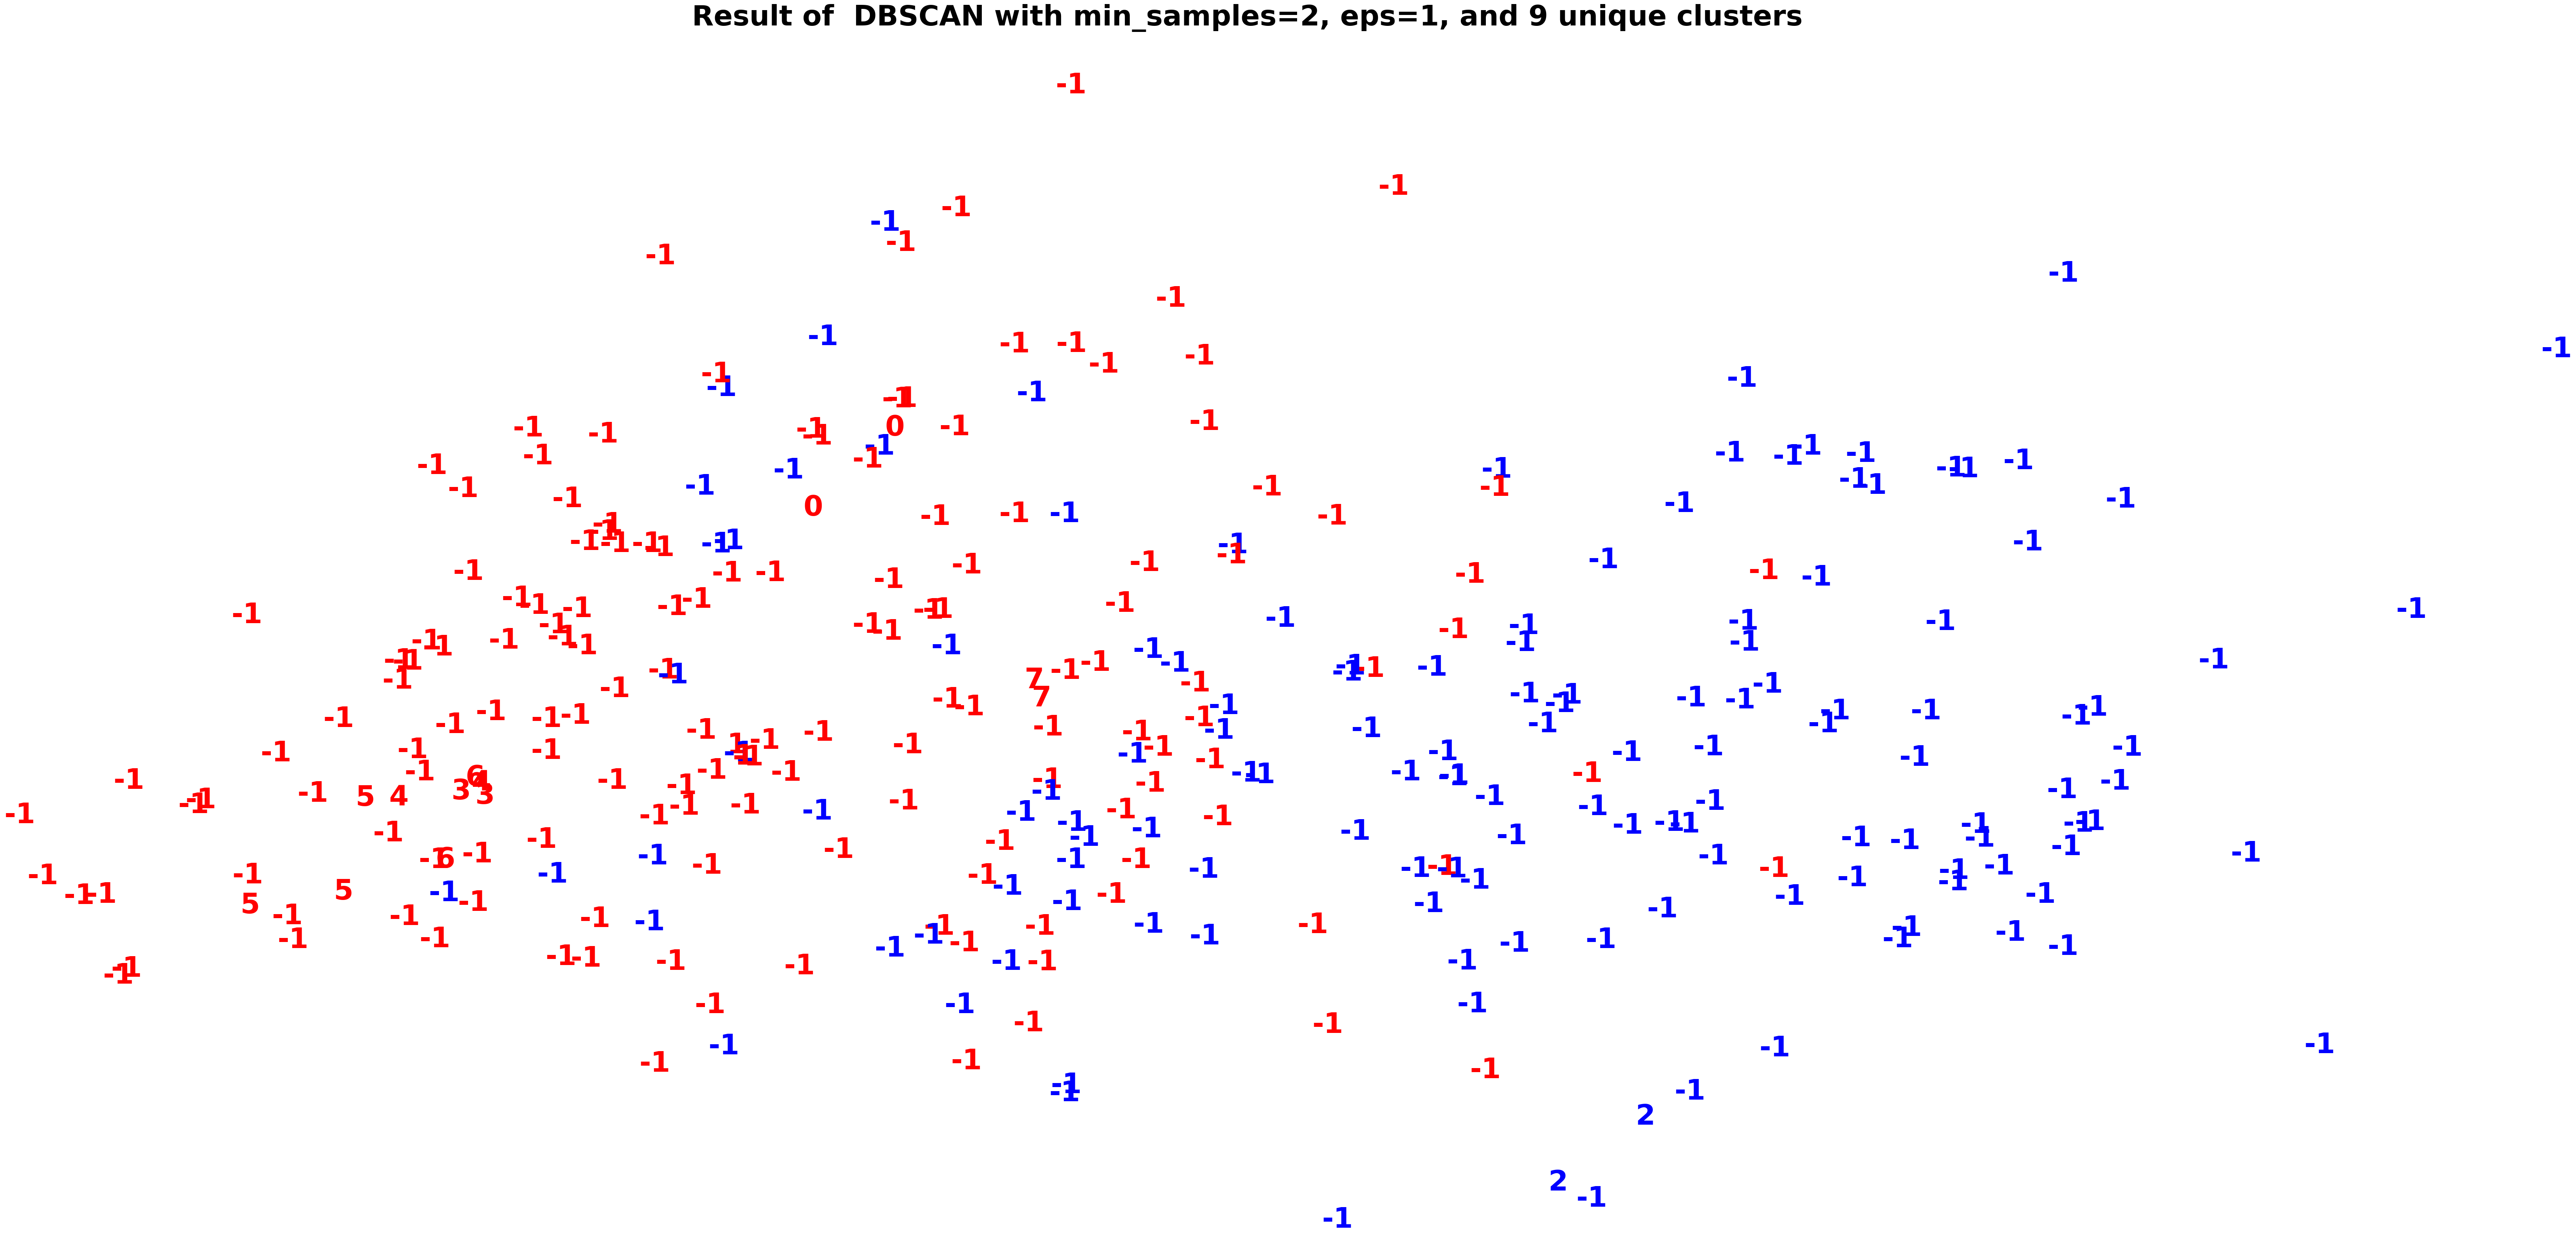

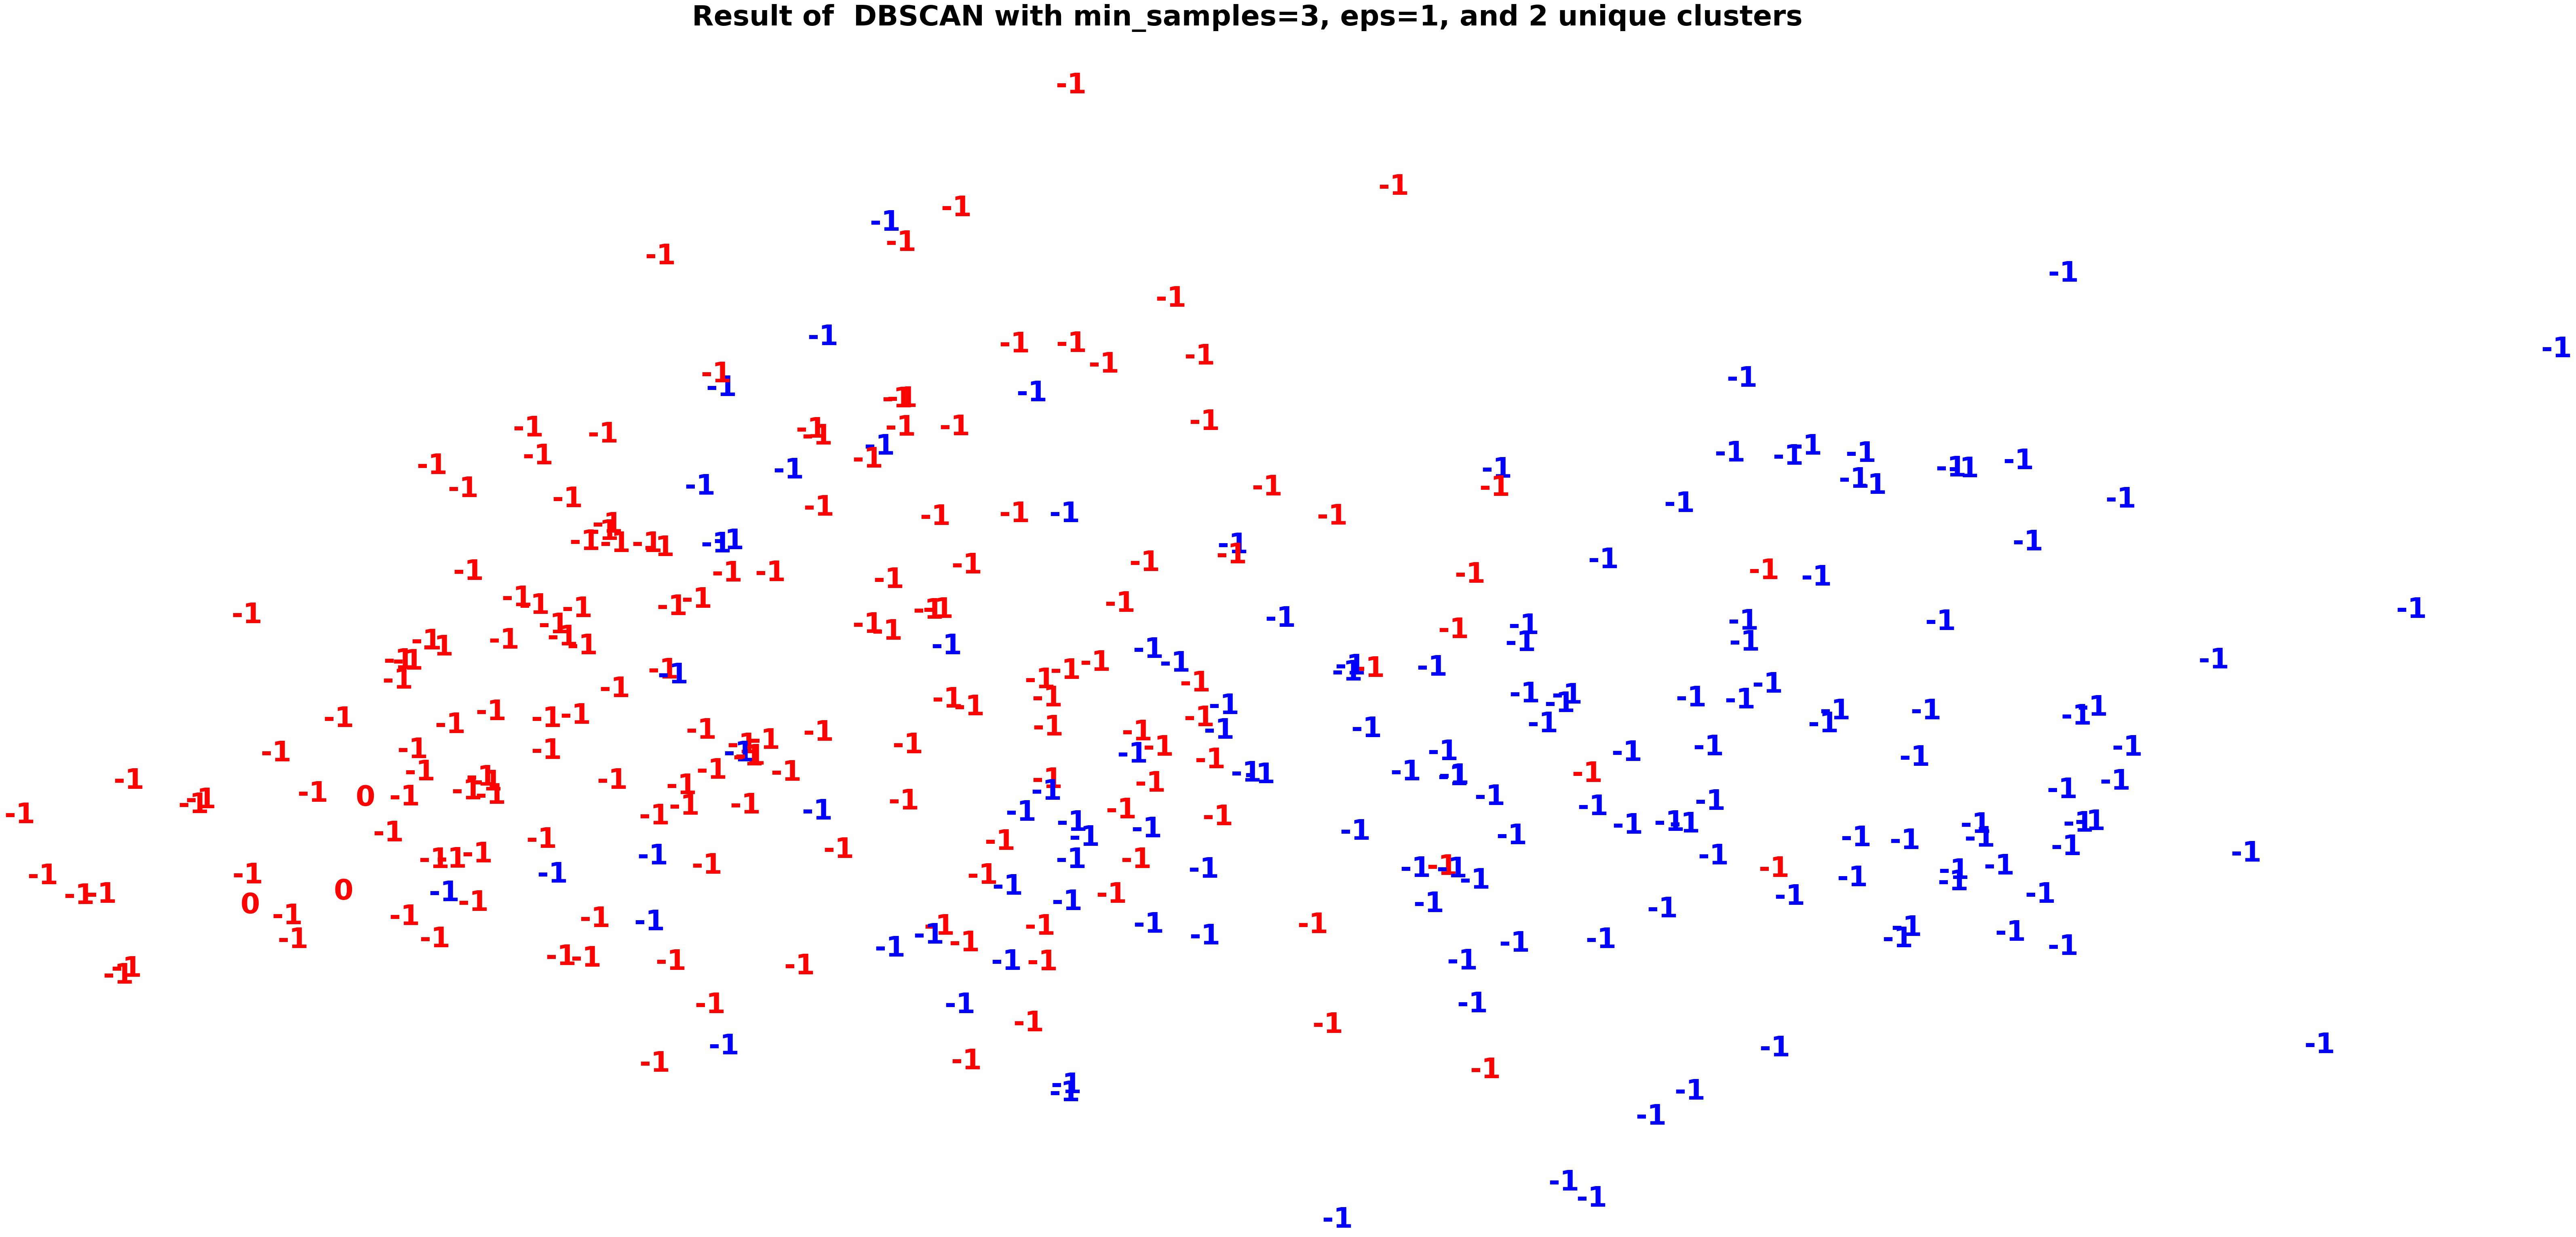

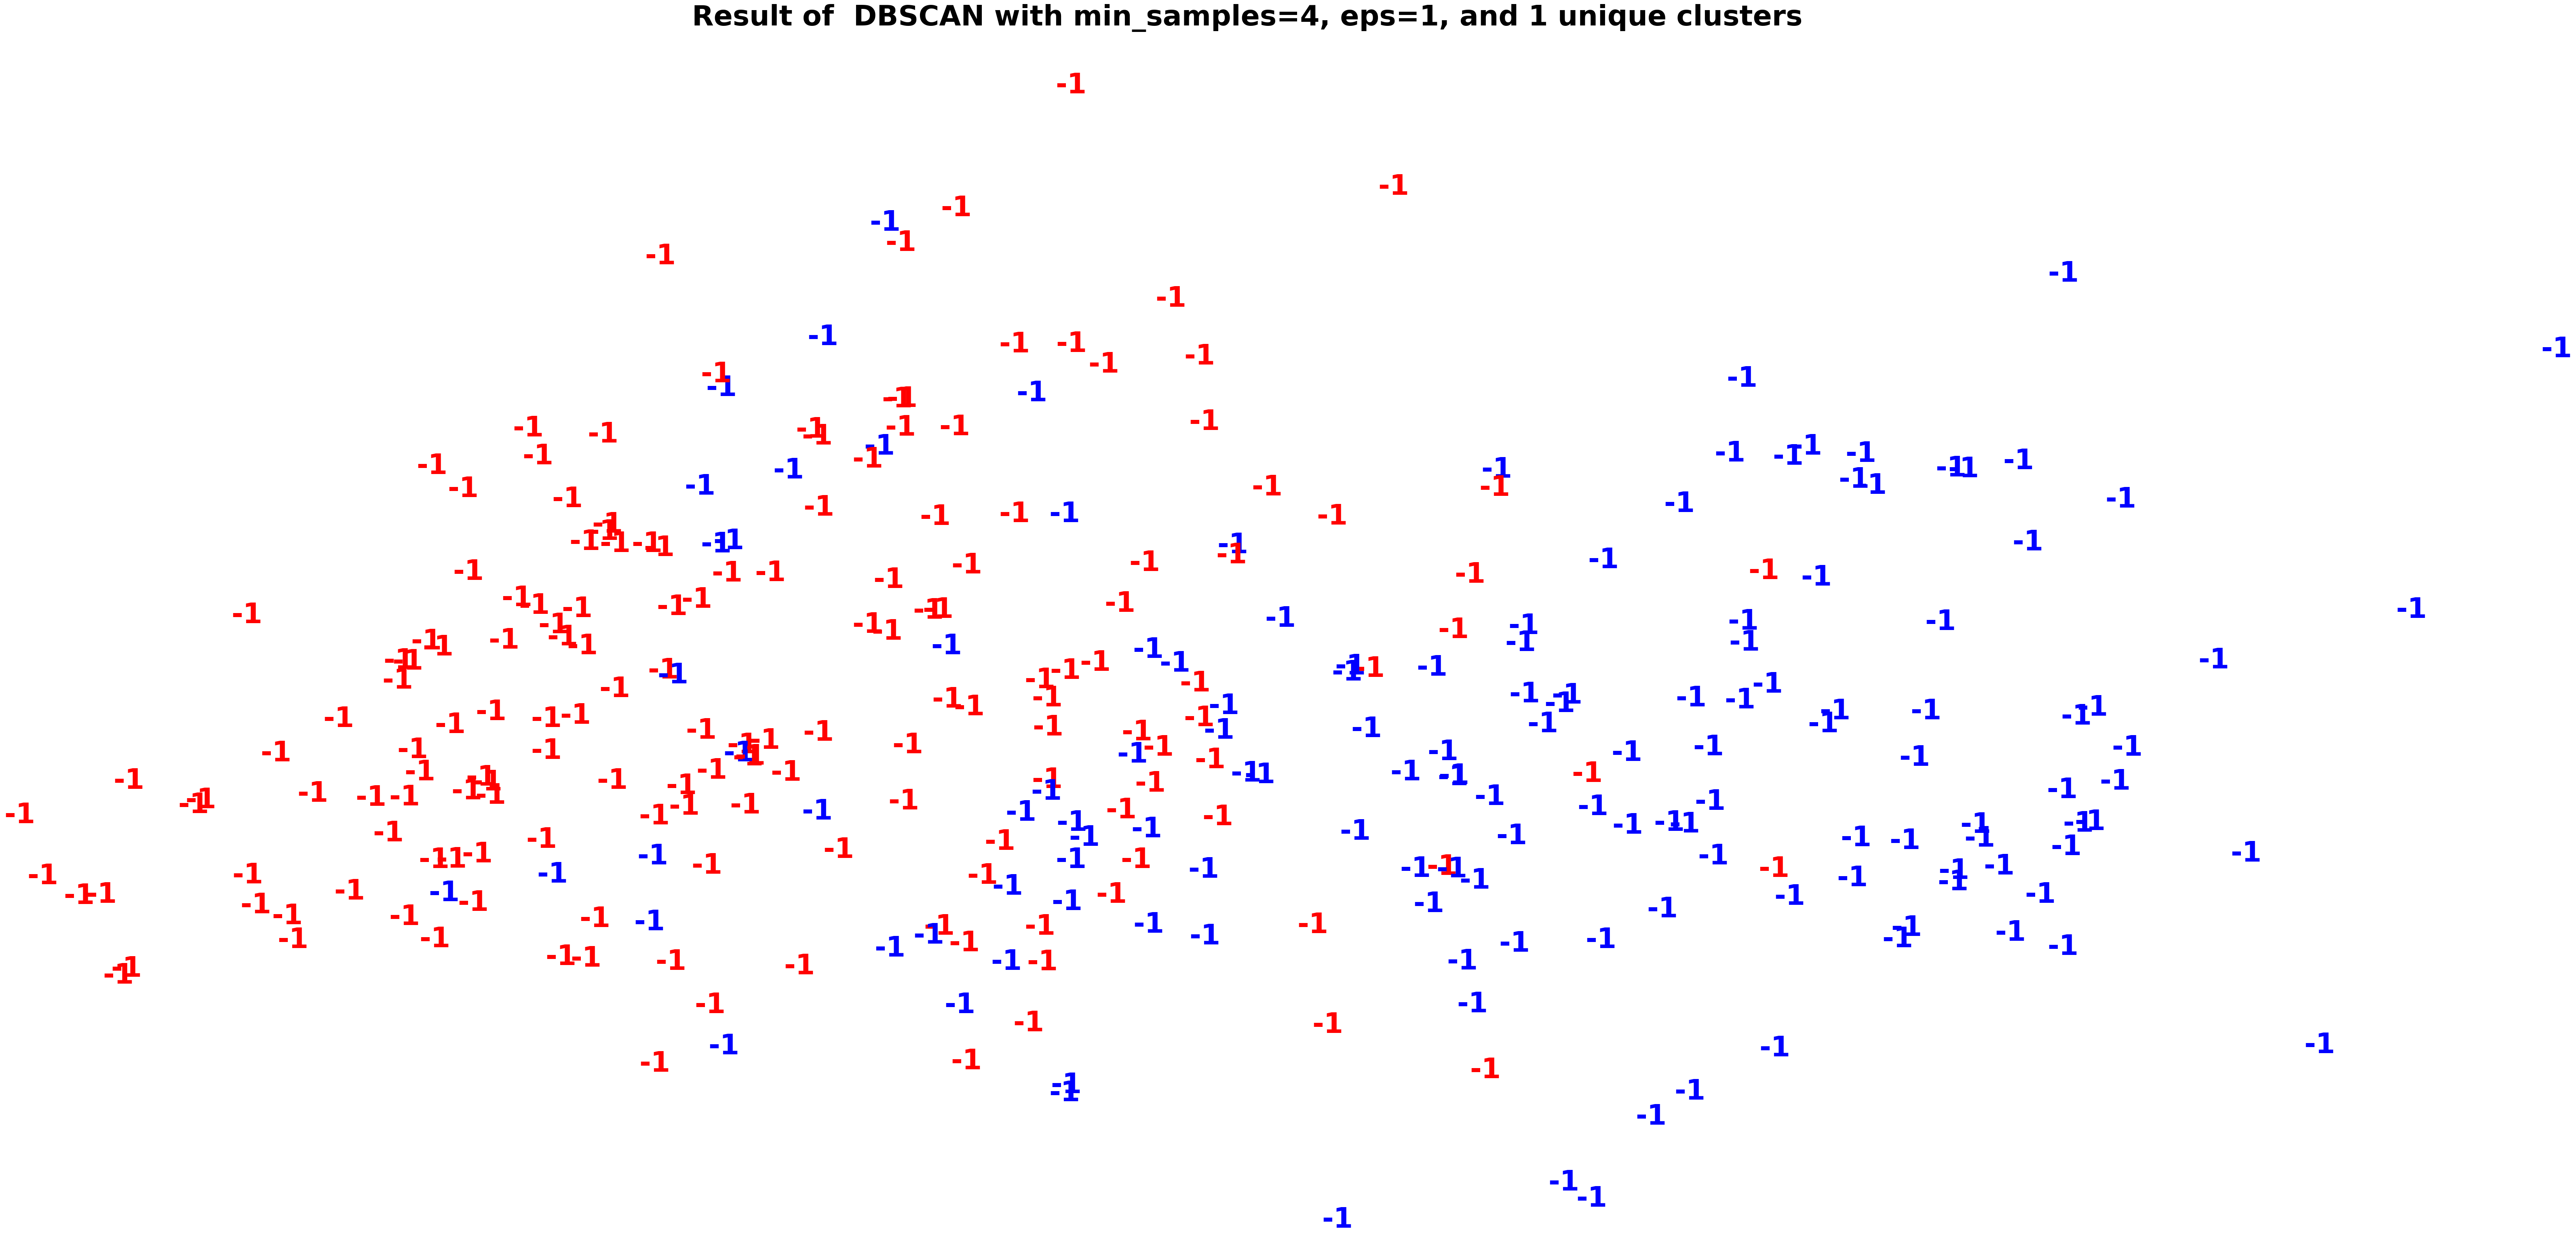

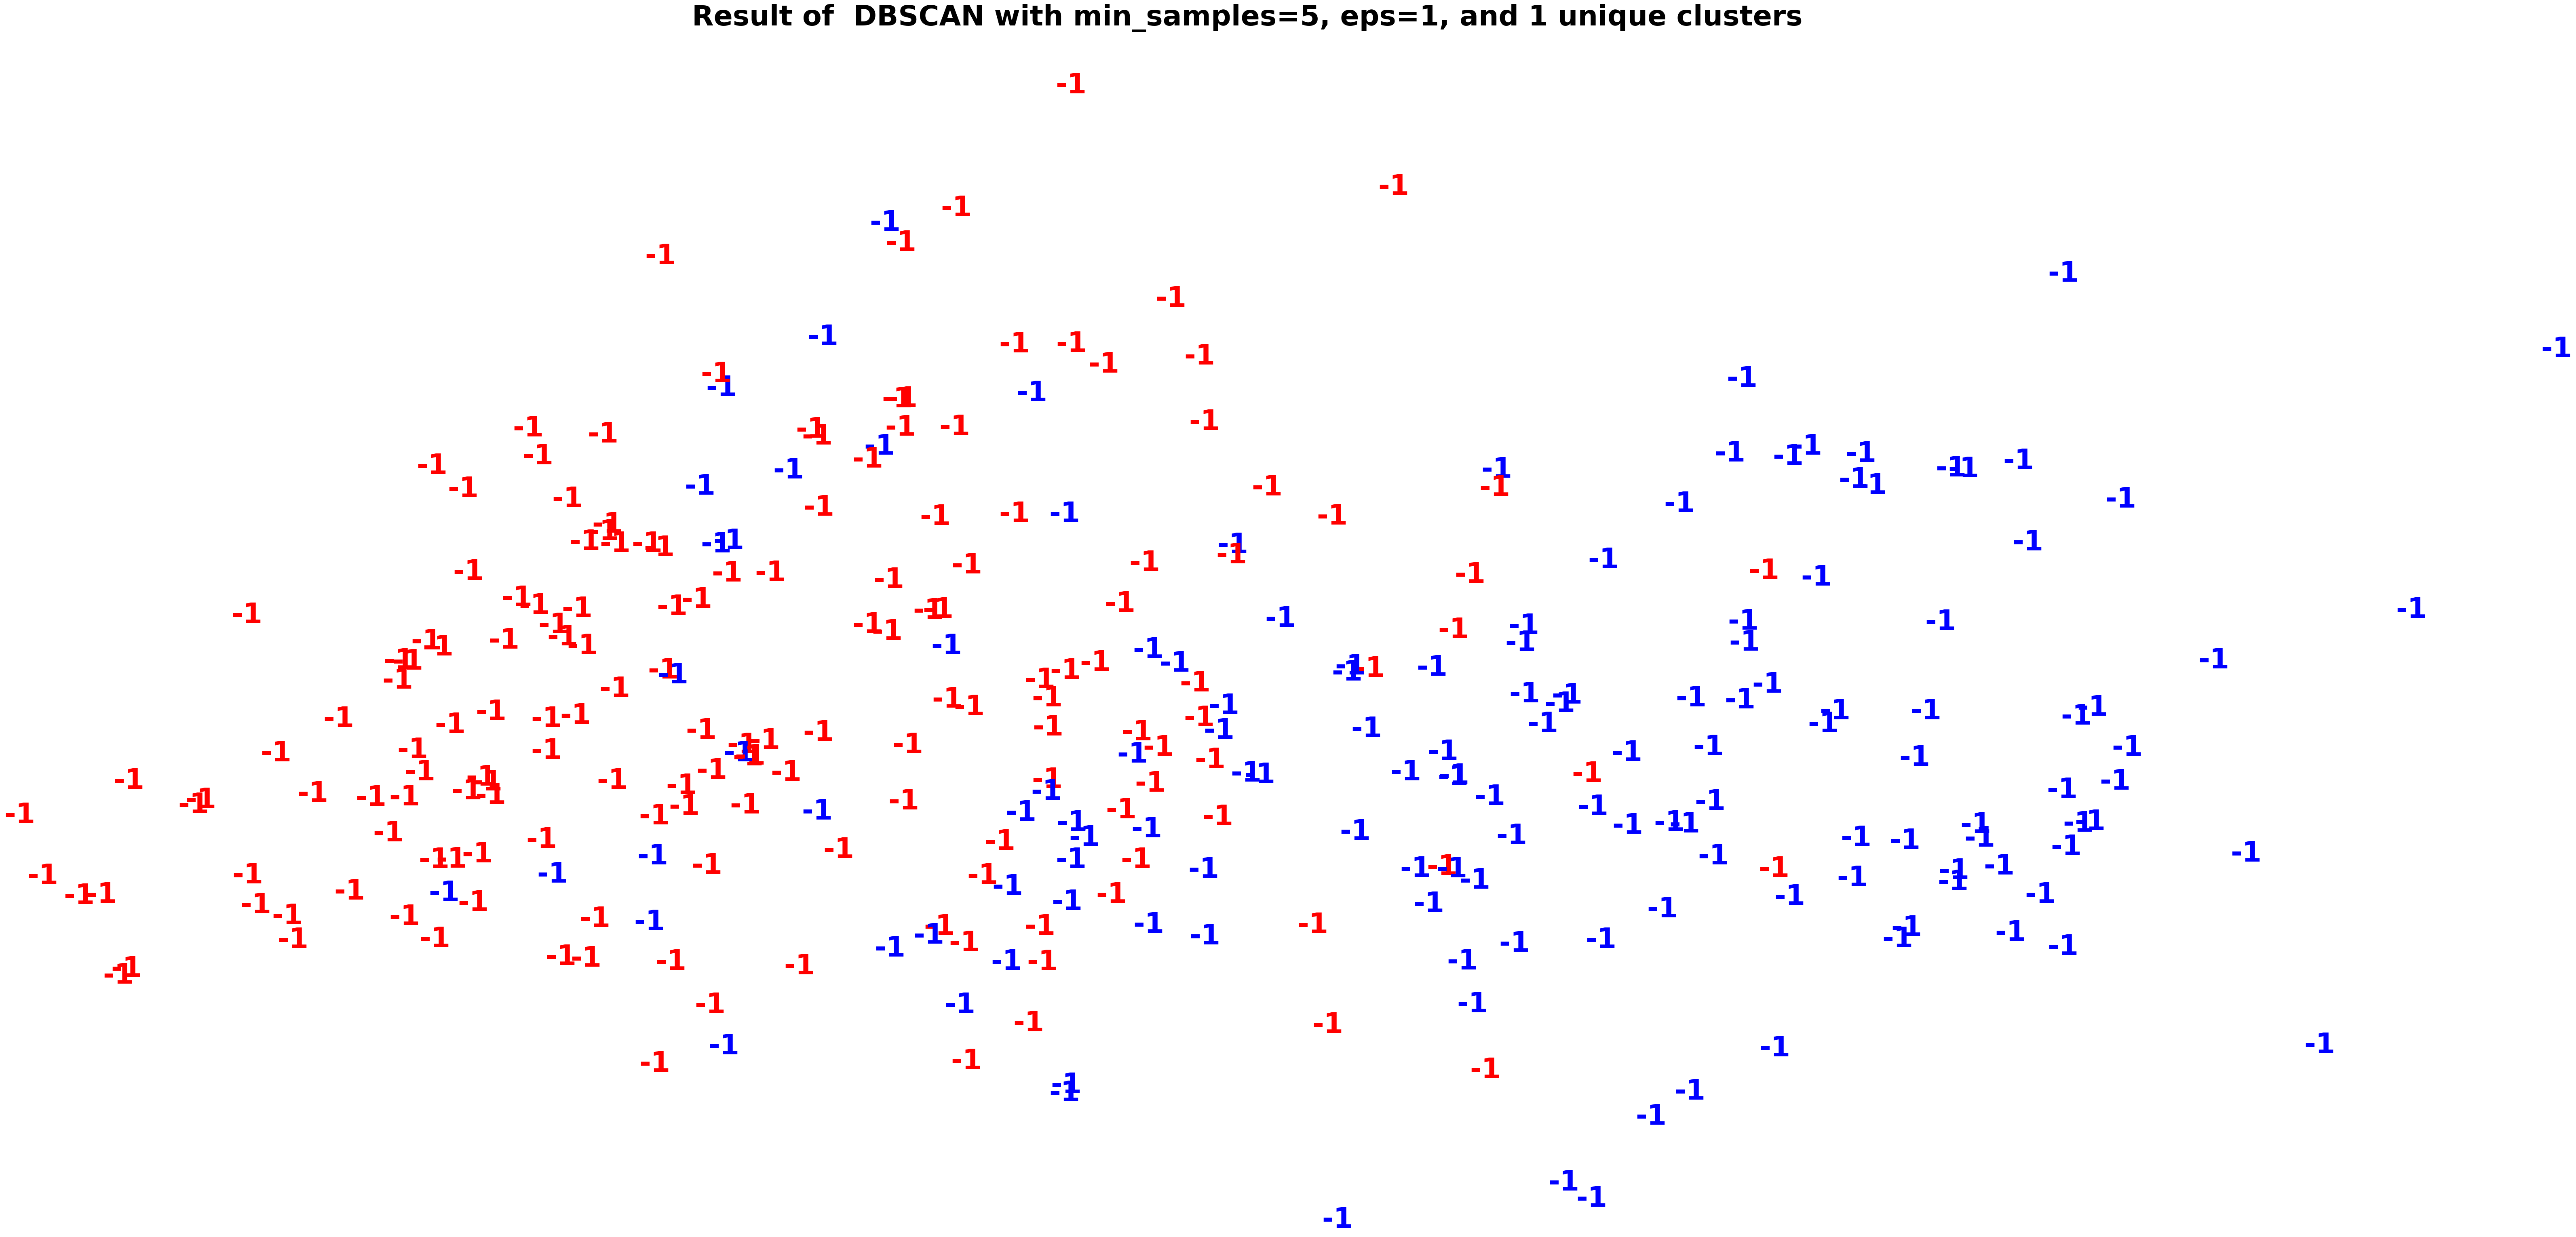

In [41]:
# Testing against minimum number of samples ranging from 1 to 5

for k in range(1,6):
  #Defining the agglomerative clustering
  dbscan_cluster = DBSCAN(eps=1, min_samples=k)

  # Fit model
  clusters = dbscan_cluster.fit_predict(X_std)

  pca = PCA(n_components=2).fit_transform(X_std)

  plt.figure(figsize=(10,5))
  plt.title('Result of  DBSCAN with min_samples={}, eps={}, and {} unique clusters'.format(k,1,len(np.unique(clusters))),
            fontdict={'weight': 'bold', 'size': 50},
            y=4.5)
  colours = 'rbg'
  for i in range(pca.shape[0]):
      plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
              color=colours[y[i]],
              fontdict={'weight': 'bold', 'size': 50}
          )
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
  plt.show()
  print('\n' * 3)

There is a two cluster solution with `eps=1` and `min_samples=3`.

### Q1(b). Apply DBSCAN by setting parameters `eps=1, min_samples=1, metric="euclidean"`. Then increase the value of `min_samples`. When you increase the value of `min_samples`, how does that affect the number of clusters that DBSCAN identifies?

In [38]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when min_samples=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,21):
    dbscan_cluster = DBSCAN(eps=1, min_samples=i, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when min_samples={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when min_samples=1 is: 294
Number of clusters when min_samples=2 is: 9
Number of clusters when min_samples=3 is: 2
Number of clusters when min_samples=4 is: 1
Number of clusters when min_samples=5 is: 1
Number of clusters when min_samples=6 is: 1
Number of clusters when min_samples=7 is: 1
Number of clusters when min_samples=8 is: 1
Number of clusters when min_samples=9 is: 1
Number of clusters when min_samples=10 is: 1
Number of clusters when min_samples=11 is: 1
Number of clusters when min_samples=12 is: 1
Number of clusters when min_samples=13 is: 1
Number of clusters when min_samples=14 is: 1
Number of clusters when min_samples=15 is: 1
Number of clusters when min_samples=16 is: 1
Number of clusters when min_samples=17 is: 1
Number of clusters when min_samples=18 is: 1
Number of clusters when min_samples=19 is: 1
Number of clusters when min_samples=20 is: 1


As observed previously, the number of clusters decreases as `min_samples` increases. There are two clusters when `min_samples=3`.

### Q1(c). Apply DBSCAN by setting parameters `eps=1, min_samples=1, metric="euclidean"`. Then increase the value of `eps`. When you increase the value of `eps`, how does that affect the number of clusters that DBSCAN identifies?

In [39]:
dbscan_cluster = DBSCAN(eps=1, min_samples=1, metric="euclidean")

# Fit model
clusters = dbscan_cluster.fit_predict(X_std)

print("Number of clusters when eps=1 is: {}".format(len(np.unique(clusters))))

min_samples_list = range(2,51)

for i in range(2,21):
    dbscan_cluster = DBSCAN(eps=i, min_samples=1, metric="euclidean")
    # Fit model
    clusters = dbscan_cluster.fit_predict(X_std)
    print("Number of clusters when eps={} is: {}".format(i, len(np.unique(clusters))))

Number of clusters when eps=1 is: 294
Number of clusters when eps=2 is: 178
Number of clusters when eps=3 is: 34
Number of clusters when eps=4 is: 3
Number of clusters when eps=5 is: 1
Number of clusters when eps=6 is: 1
Number of clusters when eps=7 is: 1
Number of clusters when eps=8 is: 1
Number of clusters when eps=9 is: 1
Number of clusters when eps=10 is: 1
Number of clusters when eps=11 is: 1
Number of clusters when eps=12 is: 1
Number of clusters when eps=13 is: 1
Number of clusters when eps=14 is: 1
Number of clusters when eps=15 is: 1
Number of clusters when eps=16 is: 1
Number of clusters when eps=17 is: 1
Number of clusters when eps=18 is: 1
Number of clusters when eps=19 is: 1
Number of clusters when eps=20 is: 1


As expected, the number of clusters decreases as `eps` increases.